In [167]:
import time
# !pip install Pillow
from PIL import Image
# !pip install numpy 
import numpy as np
# !pip install opencv-python
import cv2
# !pip install matplotlib
# !pip install scikit-image
import matplotlib.pyplot as plt
import random
import math
from math import log2
from skimage.metrics import peak_signal_noise_ratio

In [168]:
def calculate_shannon_entropy(image):
    # Step 1: Read the image in grayscale
    img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 2: Calculate histogram
    hist, _ = np.histogram(img.flatten(), bins=256, range=[0, 256])

    # Step 3: Compute probability distribution
    prob_dist = hist / float(np.sum(hist))

    # Step 4: Calculate Shannon entropy
    entropy = -np.sum([p * log2(p + 1e-10) for p in prob_dist])

    print(f"Shannon Entropy of the image: {entropy}")

    plt.hist(hist, density=1, bins=256)
    plt.show()

In [169]:
def calculate_uaci(original_image, distorted_image):
    # Ensure the images have the same dimensions
    rows, cols, _ = original_image.shape
    distorted_image = cv2.resize(distorted_image, (cols, rows))

    # Compute the absolute intensity differences between corresponding pixels
    abs_diff = np.abs(original_image.astype(float) - distorted_image.astype(float)) / 255.0

    # Compute the average intensity change
    uaci = np.mean(abs_diff) * 100.0

    return uaci

In [170]:
def uaci(img1, img2):
    height, width, channels = img1.shape  # Assuming img1 and img2 have the same shape
    
    # Initialize values for each channel
    uaci_red = 0
    uaci_green = 0
    uaci_blue = 0
    
    for y in range(height):
        for x in range(width):
            # Calculate the absolute difference for each channel
            diff_red = abs(int(img1[x, y, 0]) - int(img2[x, y, 0]))
            diff_green = abs(int(img1[x, y, 1]) - int(img2[x, y, 1]))
            diff_blue = abs(int(img1[x, y, 2]) - int(img2[x, y, 2]))
            
            # Accumulate the differences for each channel
            uaci_red += diff_red
            uaci_green += diff_green
            uaci_blue += diff_blue
    
    # Calculate the UACI value for each channel
    uaci_red = uaci_red * 100 / (width * height * 255)
    uaci_green = uaci_green * 100 / (width * height * 255)
    uaci_blue = uaci_blue * 100 / (width * height * 255)
    
    # Print UACI values for each channel
    print("UACI Red:", uaci_red)
    print("UACI Green:", uaci_green)
    print("UACI Blue:", uaci_blue)

In [171]:
def npcr(img1, img2):

    # Check if images have the same shape
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions")

    # Create bipolar array
    bipolar_array = np.zeros(img1.shape[:2], dtype=np.uint8)
    bipolar_array[(img1 != img2).any(axis=2)] = 1

    percentage_non_matching = (np.sum(bipolar_array) / bipolar_array.size) * 100
    print(percentage_non_matching)

In [172]:
def average_pixel_intensity(img):
    # Load the image

    # Calculate the average pixel intensities
    avg_intensity = np.mean(img, axis=(0, 1))
    
    print(f"Average Pixel Intensities: Red={avg_intensity[0]}, Green={avg_intensity[1]}, Blue={avg_intensity[2]}")

In [173]:
def calculate_psnr(image1, image2):
    psnr = peak_signal_noise_ratio(image1, image2)
    print(f'PSNR: {psnr:.2f} dB')

In [174]:
def print_image(image,image_name="i4.jpg",save=0):

    plt.figure(figsize=(5, 5))
    
    plt.imshow(image)
    plt.title(image_name+"{}".format(image.shape))
    plt.axis("off")
    
    plt.tight_layout()
    if(save):
        plt.savefig(image_name)
    plt.show()

In [175]:
def read_image(image_path):
    """
    This function reads an image and returns a two-dimensional array of pixel values (RGB tuples).

    Args:
      image_path: The path to the image file.

    Returns:
      A two-dimensional array of RGB pixel tuples.
    """

    image = Image.open(image_path)

    # Convert the image to RGB format if not already.
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Convert the image to a NumPy array of tuples.
    image_array = np.array(image)

    return image_array

In [176]:
def thresholding_image(image_data, random_number):
    random_number = max(0, min(random_number, 255))
    np.clip(image_data, 0, 255, out=image_data)
    image_data += random_number
    image_data = image_data.astype(np.uint8)
    return image_data

def rev_thresholding_image(thresholded_image_data, random_number):

    # Avoid unnecessary copies and work in-place
    random_number = max(0, min(random_number, 255))
    
    # Reverse the thresholding by subtracting the random_number
    thresholded_image_data -= random_number
    
    # Ensure pixel values are within the valid range
    np.clip(thresholded_image_data, 0, 255, out=thresholded_image_data)
    
    # Convert the data type back to uint8
    thresholded_image_data = thresholded_image_data.astype(np.uint8)

    return thresholded_image_data


In [177]:
def calculate_padding(image_height, image_width, sudoku_size):
    """
    Calculate the number of rows and columns needed for padding.

    Args:
      image_height: The height of the image.
      image_width: The width of the image.
      sudoku_size: The size of the Sudoku (e.g., 9, 16, etc.).

    Returns:
      padding_rows: The number of rows to pad.
      padding_columns: The number of columns to pad.
    """
    padding_rows=padding_columns=0
    
    if image_height < sudoku_size:
        padding_rows = sudoku_size - image_height
    elif image_height % sudoku_size != 0:
        padding_rows = (image_height // sudoku_size + 1) * sudoku_size - image_height
    
    if image_width < sudoku_size:
        padding_columns = sudoku_size - image_width
    
    elif image_width % sudoku_size != 0:
        padding_columns = (image_width // sudoku_size + 1) * sudoku_size - image_width

    return padding_rows, padding_columns

In [178]:
def padding(thresholded_image_data, padding_height, padding_width):
    """
    Adds padding to the thresholded_image_data array based on the sudoku_size.

    Args:
      thresholded_image_data: A NumPy array representing the image (3D array of RGB pixel values).
      sudoku_size: The size of the Sudoku (9, 16, etc.).

    Returns:
      The padded thresholded_image_data array.
    """

    height, width = thresholded_image_data.shape[:2]

    

    top_padding = padding_height // 2
    bottom_padding = padding_height - top_padding

    left_padding = padding_width // 2
    right_padding = padding_width - left_padding

    # Create the padding for RGB images
    padding_top = np.zeros((top_padding, thresholded_image_data.shape[1], thresholded_image_data.shape[2]), dtype=np.uint8)
    padding_bottom = np.zeros((bottom_padding, thresholded_image_data.shape[1], thresholded_image_data.shape[2]), dtype=np.uint8)
    padded_image_data = np.concatenate((padding_top, thresholded_image_data, padding_bottom), axis=0)

    padding_left = np.zeros((padded_image_data.shape[0], left_padding, thresholded_image_data.shape[2]), dtype=np.uint8)
    padding_right = np.zeros((padded_image_data.shape[0], right_padding, thresholded_image_data.shape[2]), dtype=np.uint8)
    padded_image_data = np.concatenate((padding_left, padded_image_data, padding_right), axis=1)

    return padded_image_data

In [179]:
def crop_padding(padded_image, original_height, original_width):
    """
    Crop the padding from a padded image to retrieve the original image.

    Args:
      padded_image: A NumPy array representing the padded image (3D array of RGB pixel values).
      original_height: The height of the original image.
      original_width: The width of the original image.

    Returns:
      The cropped original image.
    """

    padded_height, padded_width = padded_image.shape[:2]

    # Calculate the amount of padding on each side
    top_padding = (padded_height - original_height) // 2
    bottom_padding = padded_height - original_height - top_padding
    left_padding = (padded_width - original_width) // 2
    right_padding = padded_width - original_width - left_padding

    # Crop the padding to retrieve the original image
    cropped_image = padded_image[top_padding:top_padding+original_height, left_padding:left_padding+original_width]

    return cropped_image

In [180]:
def permute_image(padded_image_data,row_permutation,col_permutation):
    
    r, c, d = padded_image_data.shape
    shuffled_image = np.zeros((r, c, d), np.uint8)
    
    for i in range(r):
        for j in range(c):
                shuffled_image[i, j, :] = padded_image_data[row_permutation[i], col_permutation[j], :]
    
    return shuffled_image

In [181]:
def rev_permute_image(shuffled_image,row_permutation,col_permutation):
    
    r, c, d = shuffled_image.shape
    
    unshuffled_image = np.zeros((r, c, d), np.uint8)
    
    for i in range(r):
        for j in range(c):
            unshuffled_image[row_permutation[i], col_permutation[j], :] = shuffled_image[i, j, :]
            
    return unshuffled_image
    

In [182]:
class Sudoku:
    def __init__(self, N, K):
        self.N = N
        self.K = K

        # Compute square root of N
        SRNd = math.sqrt(N)
        self.SRN = int(SRNd)
        self.mat = [[0 for _ in range(N)] for _ in range(N)]
        
    def fillValues(self):
        # Fill the diagonal of SRN x SRN matrices
        self.fillDiagonal()
        
        # Fill remaining blocks
        self.fillRemaining(0, self.SRN)
        
        # Remove Randomly K digits to make game
        self.removeKDigits()

    def fillDiagonal(self):
        for i in range(0, self.N, self.SRN):
            self.fillBox(i, i)
            
    def unUsedInBox(self, rowStart, colStart, num):
        for i in range(self.SRN):
            for j in range(self.SRN):
                if self.mat[rowStart + i][colStart + j] == num:
                    return False
        return True

    def fillBox(self, row, col):
        num = 0
        for i in range(self.SRN):
            for j in range(self.SRN):
                while True:
                    num = self.randomGenerator(self.N)
                    if self.unUsedInBox(row, col, num):
                        break
                self.mat[row + i][col + j] = num

                
    def randomGenerator(self, num):
        return math.floor(random.random() * num + 1)

    def checkIfSafe(self, i, j, num):
        return (self.unUsedInRow(i, num) and self.unUsedInCol(j, num) and self.unUsedInBox(i - i % self.SRN, j - j % self.SRN, num))

    def unUsedInRow(self, i, num):
        for j in range(self.N):
            if self.mat[i][j] == num:
                return False
        return True

    def unUsedInCol(self, j, num):
        for i in range(self.N):
            if self.mat[i][j] == num:
                return False
        return True


    def fillRemaining(self, i, j):
        # Check if we have reached the end of the matrix
        if i == self.N - 1 and j == self.N:
            return True
        
        # Move to the next row if we have reached the end of the current row
        if j == self.N:
            i += 1
            j = 0
            
        # Skip cells that are already filled
        if self.mat[i][j] != 0:
            return self.fillRemaining(i, j + 1)

        # Try filling the current cell with a valid value
        for num in range(1, self.N + 1):
            if self.checkIfSafe(i, j, num):
                self.mat[i][j] = num
                if self.fillRemaining(i, j + 1):
                    return True
                self.mat[i][j] = 0
                
        # No valid value was found, so backtrack
        return False

    def removeKDigits(self):
        count = self.K
        
        while (count != 0):
            i = self.randomGenerator(self.N) - 1
            j = self.randomGenerator(self.N) - 1
            if (self.mat[i][j] != 0):
                count -= 1
                self.mat[i][j] = 0

        return

In [183]:
def generate_sudokus(sudoku_size, n):
    solutions = []

    for _ in range(n):
        # Create a Sudoku instance
        sudoku = Sudoku(sudoku_size, 0)  # You can adjust K as needed

        # Fill the Sudoku puzzle
        sudoku.fillValues()

        # Store the generated puzzle
        solutions.append(sudoku.mat)

    return solutions


In [184]:
def xor_sudoku(solutions):
    
    result_sudoku = solutions[0]
    iterations=len(solutions)
    result_sudoku=np.left_shift(result_sudoku,4)
    for i in range(iterations):
        if(i>0):
            solutions[i]=np.left_shift(solutions[i],4)
            outputOfNAND1 = np.bitwise_and(result_sudoku, solutions[i])
            outputOfNOR1=np.bitwise_or(result_sudoku, solutions[i])
            outputOfXOR1=np.bitwise_xor(result_sudoku, solutions[i])
            outputOfAND1=np.bitwise_and(result_sudoku, solutions[i])
            outputOfOR1=np.bitwise_or(result_sudoku, solutions[i])
            
            outputOfXOR2=np.bitwise_xor(outputOfNAND1, outputOfNOR1)
            outputOfXOR3=np.bitwise_xor(outputOfAND1, outputOfOR1)
            outputOfXOR4=np.bitwise_xor(outputOfXOR2, outputOfXOR3)
            
            result_sudoku=np.bitwise_xor(outputOfXOR1, outputOfXOR4)
            
    
#     result_sudoku=np.left_shift(result_sudoku,4)
    return result_sudoku


In [185]:
# def encrypt_block(block, matrix_list):
#     n = len(matrix_list)
# #     plt.imshow(block)
    
#     fig, axs = plt.subplots(n, 2, figsize=(100,100))
    
#     for i in range(n):
#         block = np.bitwise_xor(block, matrix_list[i])
#         axs[i][0].imshow(block)  # Use cmap='gray' for grayscale images
#         axs[i][0].set_title(f'xor{i}')
        
#         block = np.rot90(block)
#         axs[i][1].imshow(block)  # Use cmap='gray' for grayscale images
#         axs[i][1].set_title('rot90')

#     plt.show()

#     return block

def encrypt_block(block, matrix_list):
    n = len(matrix_list)
    
    for i in range(n):
        block = np.bitwise_xor(block, matrix_list[i])
        block = np.rot90(block)

    return block



def encrypt_image(image, matrix_list):
#     matrixlist ki shape nx9x9
    matrix_size = len(matrix_list[0]) #pehli matrix ka length 9 ya 16
    
    # Get the dimensions of the image
    image_height, image_width, _ = image.shape

    # Initialize an empty encrypted image
    encrypted_image = np.empty_like(image)

    # Divide the image into blocks of size sudoku_size x sudoku_size
    for i in range(0, image_height, matrix_size):
        for j in range(0, image_width, matrix_size):
            block = image[i:i + matrix_size, j:j + matrix_size]
            encrypted_block=encrypt_block(block,matrix_list)
            encrypted_image[i:i + matrix_size, j:j + matrix_size]=encrypted_block

    return encrypted_image

In [186]:
def decrypt_block(block, matrix_list):
    n = len(matrix_list)

    for i in range(n):
        block = np.rot90(block, k=-1)
        block = np.bitwise_xor(block, matrix_list[n-i-1])

    return block

def decrypt_image(encrypted_image, matrix_list):
    matrix_size = len(matrix_list[0])
    
    # Get the dimensions of the encrypted image
    image_height, image_width, _ = encrypted_image.shape

    # Initialize an empty decrypted image
    decrypted_image = np.empty_like(encrypted_image)

    # Divide the encrypted image into blocks of size matrix_size x matrix_size
    for i in range(0, image_height, matrix_size):
        for j in range(0, image_width, matrix_size):
            block = encrypted_image[i:i + matrix_size, j:j + matrix_size]
            decrypted_block = decrypt_block(block, matrix_list)
            decrypted_image[i:i + matrix_size, j:j + matrix_size] = decrypted_block

    return decrypted_image

In [187]:
def generate_random_matrices(n):
    resultant_matrices = []
    for _ in range(n):
        matrix = np.random.randint(0, 256, size=(9, 9))
        matrix = np.repeat(matrix[:, :, np.newaxis], 3, axis=2)
        resultant_matrices.append(matrix)
    return resultant_matrices

# Example: Generate 5 random matrices
n = 10

resultant_matrices = generate_random_matrices(n)

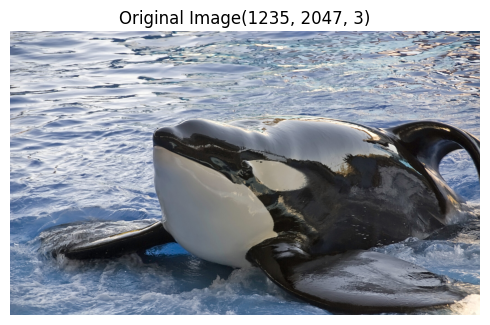

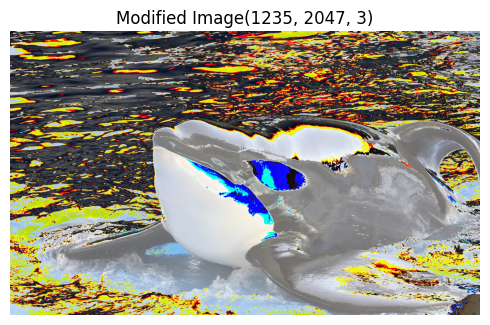

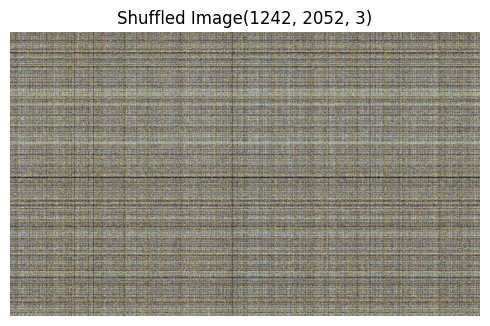

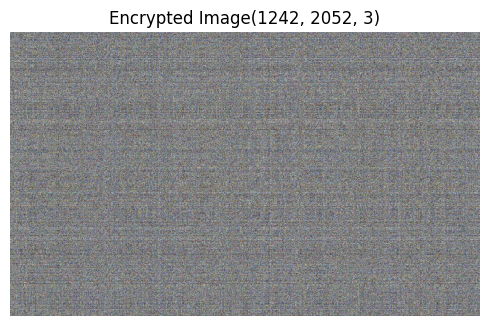

PSNR between original and encrypted image: 
PSNR: 7.28 dB


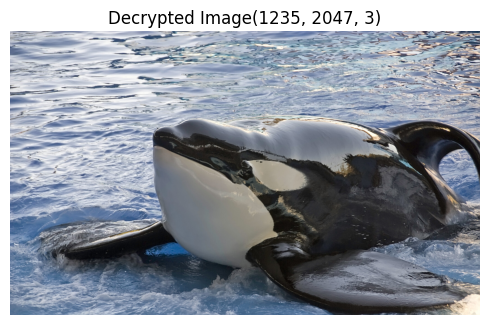

PSNR between original and Decrypted image: 
PSNR: inf dB
Execution time 1.6953489780426025 s


c:\Python311\Lib\site-packages\skimage\metrics\simple_metrics.py:163: RuntimeWarning: divide by zero encountered in scalar divide
  return 10 * np.log10((data_range ** 2) / err)


In [201]:
if __name__=="__main__":
    
    path=input("Enter the path or name of the image: ")
    raw_image = read_image(path)
    original_image=read_image(path)
    iterations = int(input("Enter number of rounds of encryption: "))
    sudoku_size = int(input("Enter size of Sudoku (9,16): "))   #
    
    height, width = raw_image.shape[:2]    # k1, k2
    
    
    # Generate a random number between 0 and 255 (inclusive)
    random_number = np.random.randint(50, 250)      #k5
    
    
    # Apply thresholding operations
    i1 = thresholding_image(raw_image.copy(),random_number)
    
    # Calculate total padding required 
    padding_height, padding_width = calculate_padding(height, width, sudoku_size)
    
    # Apply padding operations
    i2 = padding(i1, padding_height, padding_width)
    
    
    
    height1, width1 = i2.shape[:2]
    
    row_permutation = np.random.permutation(height1) #k3
    col_permutation = np.random.permutation(width1)  #k4
    
    # Generate sudokus
    start=time.time()
    solutions = generate_sudokus(sudoku_size, iterations)
    end=time.time()
#     result = xor_sudoku(solutions)
    
    # Shuffle Pixel
    i3 = permute_image(i2,row_permutation,col_permutation)
    
    # Encrypt image
    
    i4 =encrypt_image(i3,resultant_matrices)
    
    # Final shuffling
    encrypted_image = permute_image(i4,row_permutation,col_permutation)
    
    
    
    
    
    ################   Decryption   #################
    
    # unshuffle image
    d1 = rev_permute_image(encrypted_image.copy(),row_permutation,col_permutation)
    
    # decrypt image
    d2 = decrypt_image(d1,resultant_matrices)
    
    # unshuffle image
    d3 = rev_permute_image(d2,row_permutation,col_permutation)
    
    # remove pad
    d4 = crop_padding(d3, height, width)
    
    # remove threshold
    decrypted_image = rev_thresholding_image(d4, random_number)
    
    
    
    ### Original Image
    print_image(original_image,"Original Image")
    
    print_image(i1,"Modified Image")
    
    print_image(i3,"Shuffled Image")
    
    
    ### Encrypted Image
    print_image(encrypted_image,"Encrypted Image")
    
    ### PSNR value between original and encrypted image
    print("PSNR between original and encrypted image: ")
    calculate_psnr(i2,encrypted_image)
    
    ### Decrypted Image
    print_image(decrypted_image,"Decrypted Image")
    
#     ### PSNR value between original and decrypted image
    print("PSNR between original and Decrypted image: ")
    calculate_psnr(original_image,decrypted_image)
    
    print("Execution time",(end-start),"s") 
    
    

In [202]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist1(image):
    red, green, blue = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    red_pixels = red.flatten()
    green_pixels = green.flatten()
    blue_pixels = blue.flatten()

    # Overlay histograms of the pixels of each color in the bottom subplot
    plt.figure(figsize=(15, 15))
    plt.hist(red_pixels, bins=256, density=False, color='red', alpha=0.5)
    plt.hist(green_pixels, bins=256, density=False, color='green', alpha=0.4)
    plt.hist(blue_pixels, bins=256, density=False, color='blue', alpha=0.3)

    # Set labels and ticks
    plt.xticks(ticks=np.linspace(0, 1, 17), labels=range(0, 257, 16), fontsize=18)  # Adjust fontsize here
    plt.yticks(fontsize=35)  # Adjust fontsize here

    # Cosmetics
    # plt.title('Histograms from color image', fontsize=16)  # Adjust title fontsize here
    plt.ylabel('Counts', fontsize=30)  # Adjust ylabel fontsize here
    plt.xlabel('Intensity', fontsize=30)  # Adjust xlabel fontsize here

    # Display the plot
    plt.savefig("orca-sadhistogram_original.png")
    plt.show()


In [203]:
import numpy as np
import matplotlib.pyplot as plt

def plot_hist2(image):
    red, green, blue = image[:, :, 0], image[:, :, 1], image[:, :, 2]

    red_pixels = red.flatten()
    green_pixels = green.flatten()
    blue_pixels = blue.flatten()

    # Overlay histograms of the pixels of each color in the bottom subplot
    plt.figure(figsize=(15, 15))
    plt.hist(red_pixels, bins=256, density=False, color='red', alpha=0.5)
    plt.hist(green_pixels, bins=256, density=False, color='green', alpha=0.4)
    plt.hist(blue_pixels, bins=256, density=False, color='blue', alpha=0.3)

    # Set labels and ticks
    plt.xticks(ticks=np.linspace(0, 1, 17), labels=range(0, 257, 16), fontsize=18)  # Adjust fontsize here
    plt.yticks(fontsize=35)  # Adjust fontsize here

    # Cosmetics
    # plt.title('Histograms from color image', fontsize=16)  # Adjust title fontsize here
    plt.ylabel('Counts', fontsize=30)  # Adjust ylabel fontsize here
    plt.xlabel('Intensity', fontsize=30)  # Adjust xlabel fontsize here

    # Display the plot
    plt.savefig("orca-sadhistogram_encrypted.png")
    plt.show()


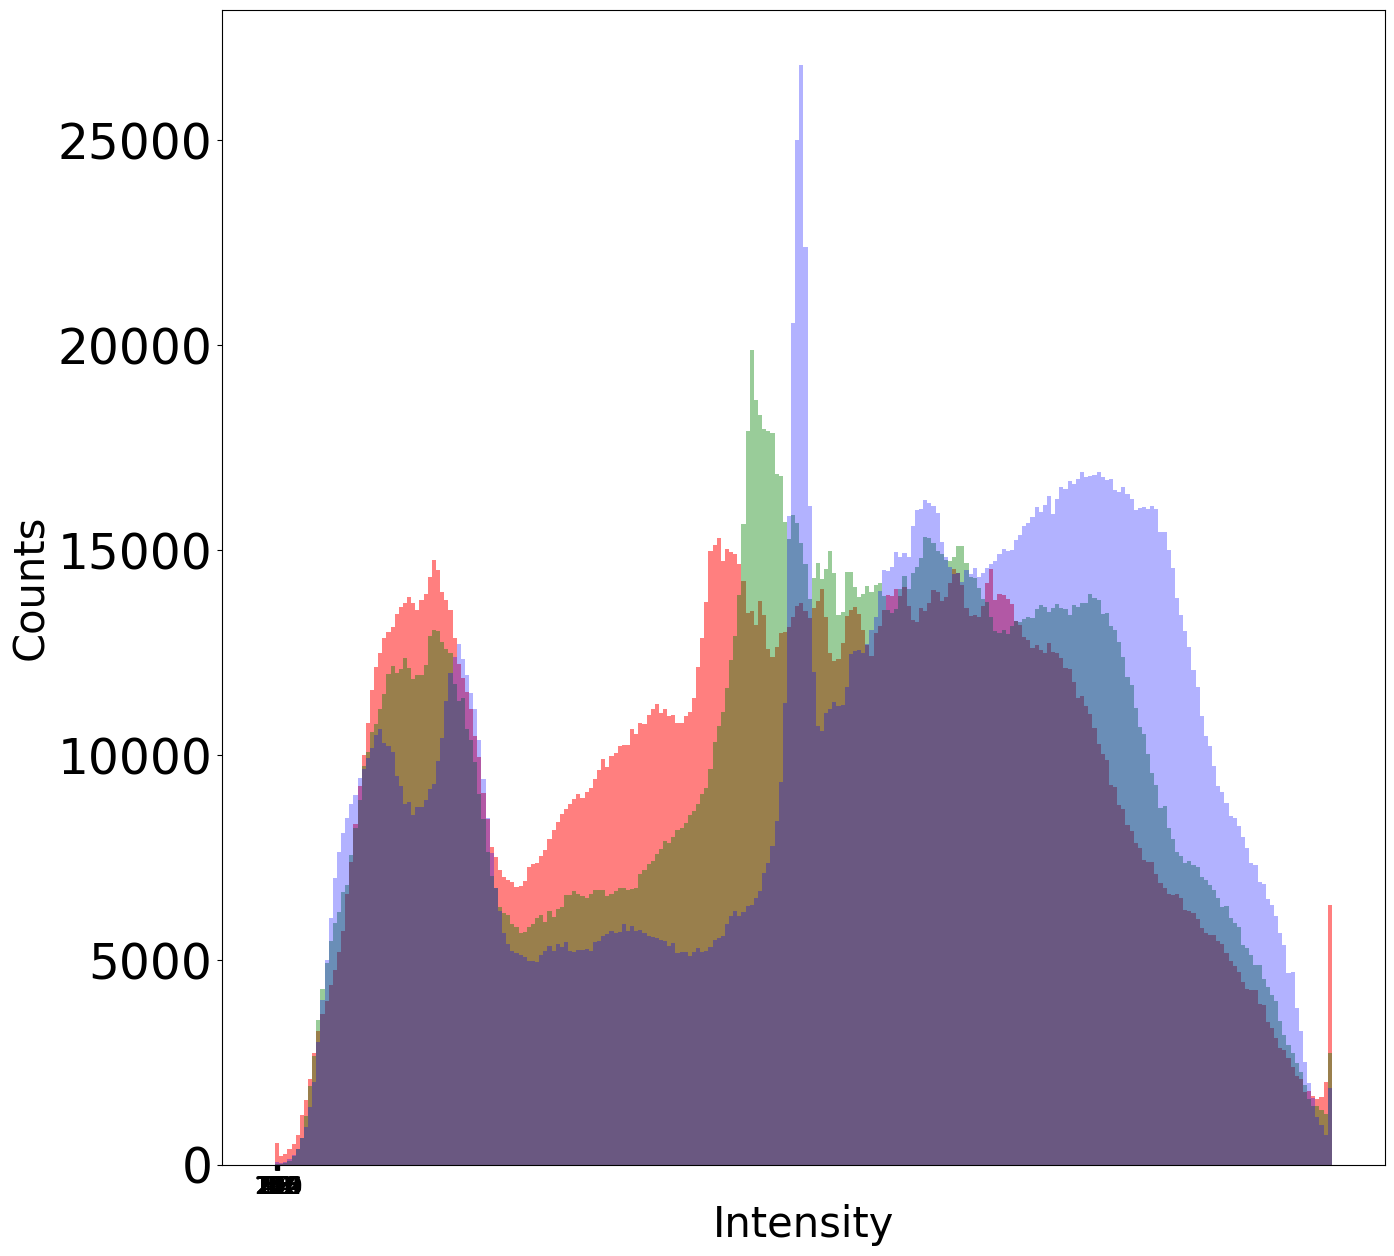

In [204]:
plot_hist1(raw_image)

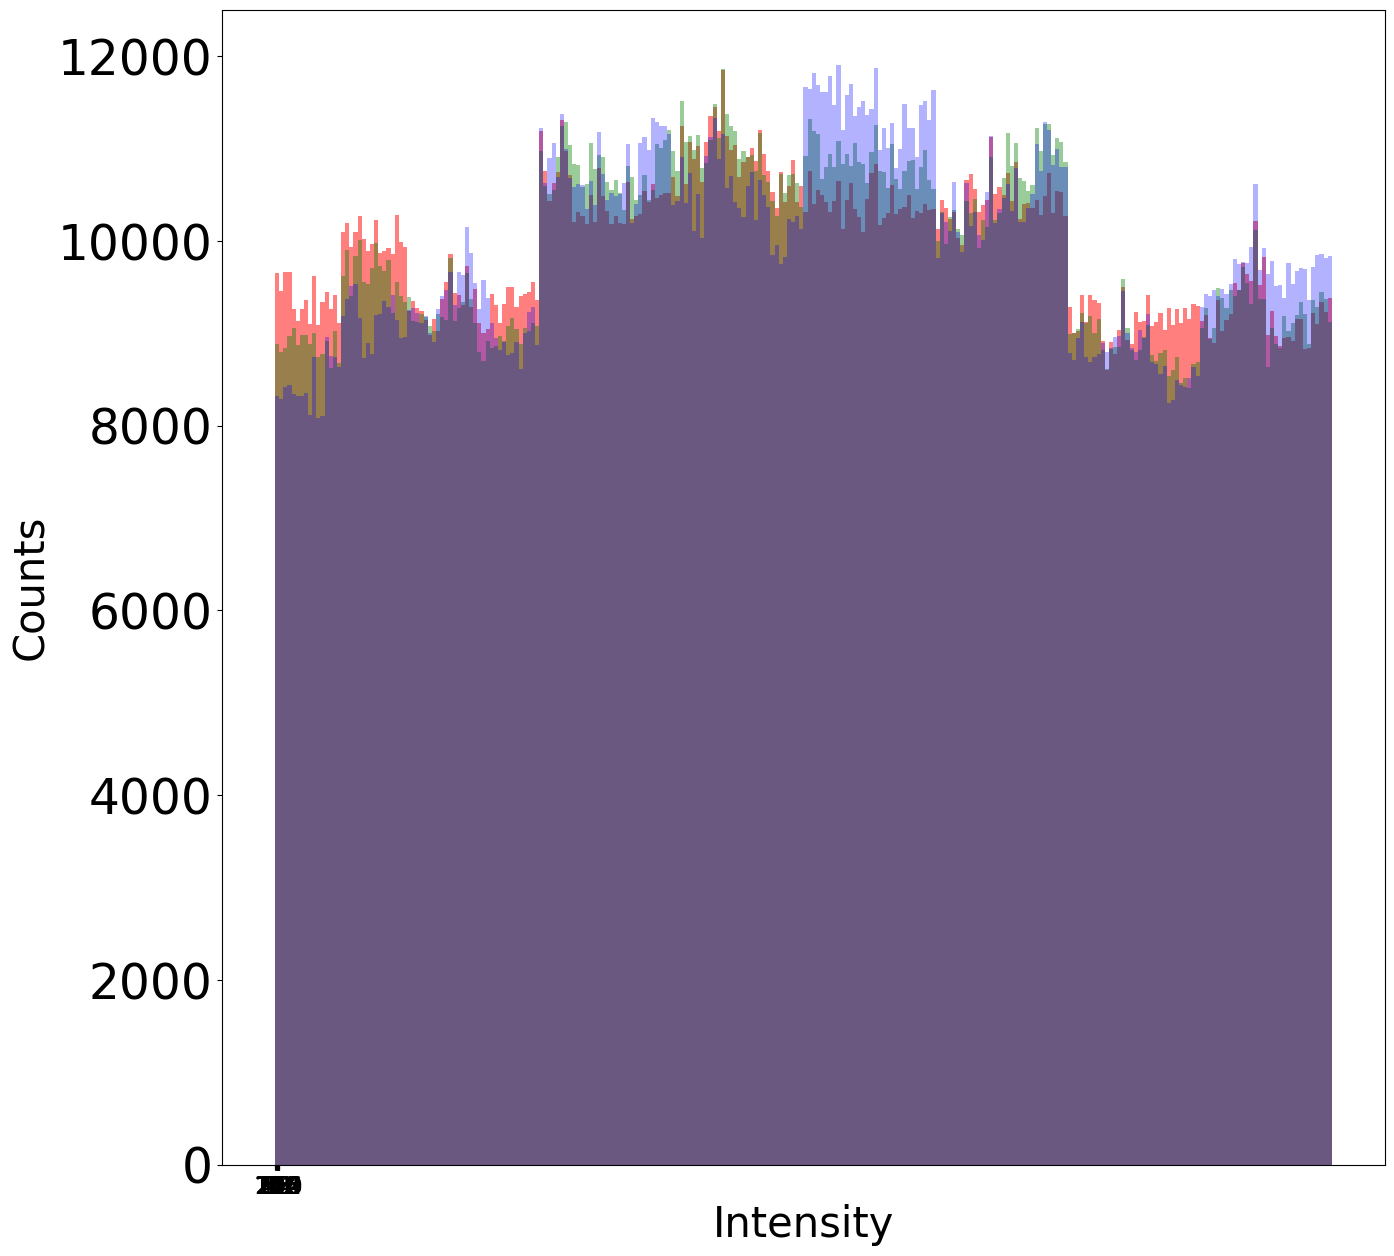

In [205]:
plot_hist2(encrypted_image)

In [193]:
resultant_matrices

[array([[[243, 243, 243],
         [244, 244, 244],
         [ 50,  50,  50],
         [107, 107, 107],
         [226, 226, 226],
         [156, 156, 156],
         [156, 156, 156],
         [149, 149, 149],
         [171, 171, 171]],
 
        [[100, 100, 100],
         [133, 133, 133],
         [212, 212, 212],
         [217, 217, 217],
         [ 32,  32,  32],
         [ 14,  14,  14],
         [ 60,  60,  60],
         [138, 138, 138],
         [177, 177, 177]],
 
        [[251, 251, 251],
         [222, 222, 222],
         [161, 161, 161],
         [139, 139, 139],
         [ 42,  42,  42],
         [148, 148, 148],
         [238, 238, 238],
         [184, 184, 184],
         [  3,   3,   3]],
 
        [[149, 149, 149],
         [149, 149, 149],
         [117, 117, 117],
         [ 14,  14,  14],
         [133, 133, 133],
         [122, 122, 122],
         [  3,   3,   3],
         [125, 125, 125],
         [ 69,  69,  69]],
 
        [[ 98,  98,  98],
         [195, 195, 195],


# uaci

In [194]:
calculate_uaci(i2,encrypted_image)

31.40887825117386

In [195]:
image2[100,150]

NameError: name 'image2' is not defined

In [ ]:
image2=read_image(path)

In [ ]:
image2[100,150]=[100,150,200]

In [ ]:
image2[100,150]

In [ ]:
i11 = thresholding_image(image2,random_number)

In [ ]:
i21 = padding(i11, padding_height, padding_width)

In [ ]:
i31 = permute_image(i21,row_permutation,col_permutation)

In [ ]:
i41 =encrypt_image(i31,resultant_matrices)

In [ ]:
encrypted_image1=permute_image(i41,row_permutation,col_permutation)

In [ ]:
calculate_uaci(encrypted_image,encrypted_image1)